<class 'numpy.ndarray'>
uint8
(115, 115, 3)
0
231


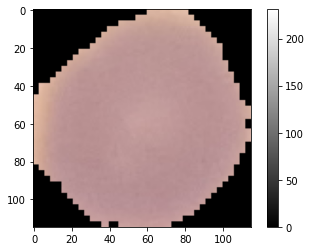

In [47]:
from skimage import io
import numpy as np
from matplotlib import pyplot as plt

def read_image(path):
    return io.imread(path)

def display_image(image, cmap="gray"):
    return plt.imshow(image, cmap)
   

image = read_image('cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png')

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min())
print(image.max())

# random_image = np.random.random([500,500])
display_image(image)
plt.colorbar()


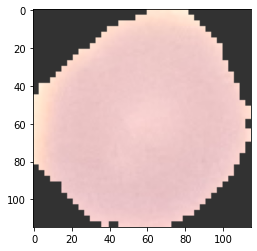

In [48]:
light_image = image.copy()

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            light_image[i,j,k] = min(light_image[i,j,k] + 50, 255)

display_image(light_image)

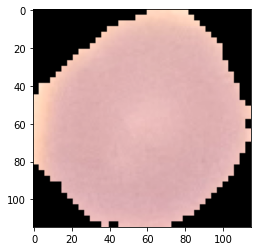

In [49]:
red_image = image.copy()

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            if np.mean(image[i,j,k]) > 100:
                red_image[i,j,k] = min(int(image[i,j,k] * 1.2), 255)
            else:
                red_image[i,j,k] = max(int(image[i,j,k] / 1.2), 0)
            
display_image(red_image)

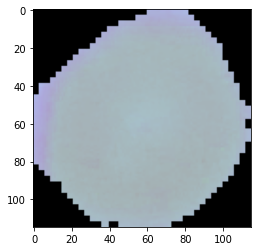

In [51]:
import cv2

def image_HSV(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#red_image = image_HSV(red_image)
#display_image(red_image)

image = image_HSV(image)
display_image(image)

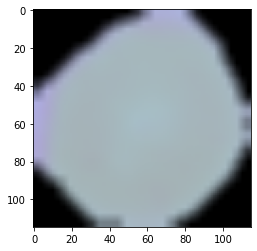

In [52]:
#MEAN FILTER
def blur_image(image, figure_size):
    return cv2.blur(image,(figure_size, figure_size))

fig_size = 9
blurred_image = blur_image(image, fig_size)
display_image(blurred_image)

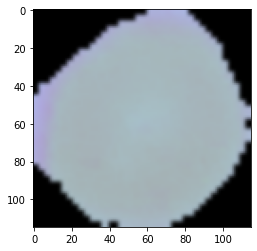

In [56]:
#GAUSSIAN FILTER
def gaussian_filter(image, figure_size, b=0):
    #last arg is border type
    return cv2.GaussianBlur(image, (figure_size, figure_size),b)
figsize = 5
gaussian_image = gaussian_filter(image, figsize)
display_image(gaussian_image)